# **Diabetic Retinopathy**
Diabetic retinopathy (DR), a major vision threat for diabetics, requires a more precise classification system.  Existing methods lack accuracy and don't fully capture the variations in DR.  A new system, combining clinical exams, advanced imaging (OCT, angiography), and molecular markers, aims to categorize patients based on their individual risk and optimal treatment. Machine learning will analyze this data to improve DR detection and predict its progression. This will ultimately lead to personalized treatment plans, minimizing vision loss and improving patient outcomes.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
!ls /kaggle/input/colored_images/colored_images

Mild  Moderate	No_DR  Proliferate_DR  Severe


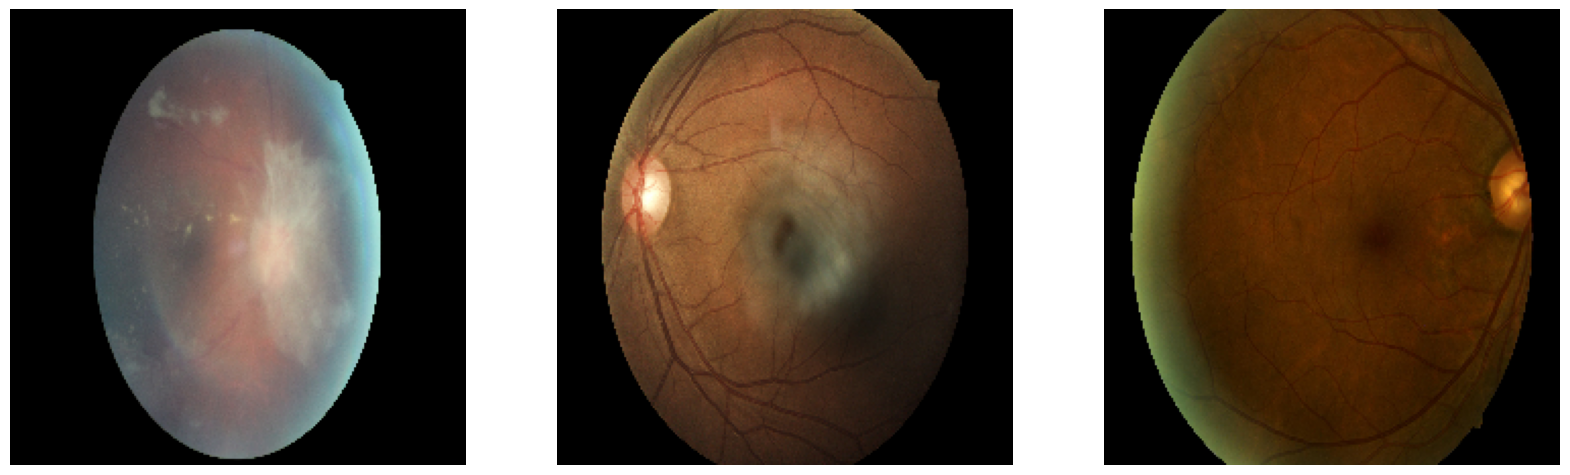

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random

dataset_directory='/kaggle/input/colored_images/colored_images'
# Get a list of all subdirectories (i.e., classes)
classes = [d for d in os.listdir(dataset_directory) if os.path.isdir(os.path.join(dataset_directory, d))]

fig, axs = plt.subplots(1, 3, figsize=(20, 20))
axs = axs.ravel()

for i in range(3):
    # Choose a random class
    class_choice = random.choice(classes)
    class_dir = os.path.join(dataset_directory, class_choice)

    # Choose a random image from this class
    img_name = random.choice(os.listdir(class_dir))
    img_path = os.path.join(class_dir, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()

In [ ]:
import pandas as pd
import os

# Define the directory where the balanced data is located
balanced_data_dir = '/kaggle/input/colored_images/colored_images'

# Get a list of all subdirectories (i.e., classes)
classes = [d for d in os.listdir(balanced_data_dir) if os.path.isdir(os.path.join(balanced_data_dir, d))]

# Create a dictionary to store the number of images in each class
class_counts = {}

# For each class in the balanced data directory
for cls in classes:
    # Get a list of all the image files in the class directory
    class_dir = os.path.join(balanced_data_dir, cls)
    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)]

    # Store the number of images in the dictionary
    class_counts[cls] = len(images)

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['No. of Images'])

# Display the DataFrame
print(df.to_string())

                No. of Images
Proliferate_DR            708
Moderate                 5292
Severe                    873
Mild                     2443
No_DR                   25810


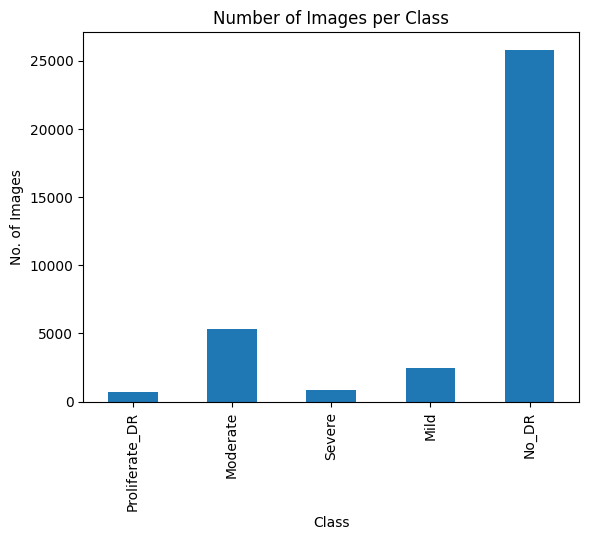

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Create a bar chart of the number of images in each class
df.plot(kind='bar', legend=False)
plt.xlabel('Class')
plt.ylabel('No. of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=90)
plt.show()


In [ ]:
import os
import shutil  # Not used in this code, but uncomment if needed for copying files
import numpy as np
from sklearn.utils import resample
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img  # Use tensorflow.keras for consistency

# Define the directory where your data is located
data_dir = '/kaggle/input/colored_images/colored_images'

# Define the directory where the balanced data will be saved
balanced_data_dir = '/kaggle/working/Balanced_dataset'  # Save to writable directory (recommended)

# Define the desired number of samples per class
desired_samples = 8000

# Function to handle class oversampling or undersampling
def balance_class(class_dir, images, desired_samples):
  """
  Balances a class by oversampling or undersampling images.

  Args:
      class_dir: Path to the directory containing class images.
      images: List of image paths in the class directory.
      desired_samples: Target number of samples for the balanced class.

  Returns:
      A list of resampled image paths.
  """

  if len(images) < desired_samples:
    # Oversample if class has fewer images
    return resample(images, replace=True, n_samples=desired_samples)
  else:
    # Undersample if class has more images
    return resample(images, replace=False, n_samples=desired_samples)

# Loop through each class
for cls in os.listdir(data_dir):
  # Get class directory and image paths
  class_dir = os.path.join(data_dir, cls)
  images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)]

  # Balance the class using the function
  balanced_images = balance_class(class_dir, images, desired_samples)

  # Create the class directory in the balanced data directory (if it doesn't exist)
  os.makedirs(os.path.join(balanced_data_dir, cls), exist_ok=True)

  # Save the balanced images
  for i, img_path in enumerate(balanced_images):
    img = load_img(img_path)
    save_img(os.path.join(balanced_data_dir, cls, f'image_{i}.bmp'), img)


In [ ]:


import pandas as pd
import os

# Define the directory where the balanced data is located
balanced_data_dir = '/kaggle/working/Balanced_dataset'

# Get a list of all subdirectories (i.e., classes)
classes = [d for d in os.listdir(balanced_data_dir) if os.path.isdir(os.path.join(balanced_data_dir, d))]

# Create a dictionary to store the number of images in each class
class_counts = {}

# For each class in the balanced data directory
for cls in classes:
    # Get a list of all the image files in the class directory
    class_dir = os.path.join(balanced_data_dir, cls)
    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)]

    # Store the number of images in the dictionary
    class_counts[cls] = len(images)

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['No. of Images'])

# Display the DataFrame
print(df.to_string())

                No. of Images
Proliferate_DR           8000
Moderate                 8000
Severe                   8000
Mild                     8000
No_DR                    8000


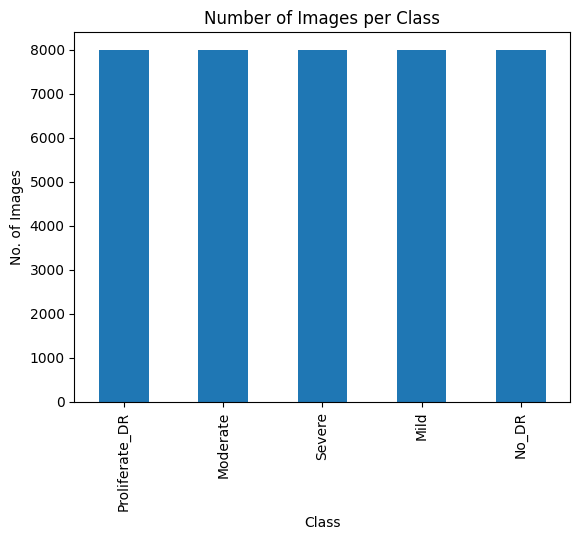

In [ ]:
# Create a bar chart of the number of images in each class
df.plot(kind='bar', legend=False)
plt.xlabel('Class')
plt.ylabel('No. of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Define the directory that contains the original data
balanced_dir = '/kaggle/working/Balanced_dataset'

# Define the directories that will hold the training and testing data
train_dir = '/kaggle/working/train'
test_dir = '/kaggle/working/test'

# Get the list of all classes
classes = os.listdir(balanced_dir)

# For each class, split the data into training and testing sets
for class_name in classes:
    # Get a list of all the image filenames for this class
    image_filenames = os.listdir(os.path.join(balanced_dir, class_name))

    # Split the filenames into training and testing sets
    train_files, test_files = train_test_split(image_filenames, test_size=0.2, random_state=42)

    # Create directories for this class in the training and testing directories
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Copy the training and testing files to the appropriate directories
    for filename in train_files:
        shutil.copy(os.path.join(balanced_dir, class_name, filename), os.path.join(train_dir, class_name, filename))
    for filename in test_files:
        shutil.copy(os.path.join(balanced_dir, class_name, filename), os.path.join(test_dir, class_name, filename))


In [ ]:
#Defining the Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.2
)

In [ ]:

#Defining the training datagenerator
training_data_generator=datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    subset='training',
    batch_size=32,
    class_mode='categorical',
)
#Defining the validation datagenerator
validation_data_generator=datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    subset='validation',
    batch_size=16,
    class_mode='categorical'
)

Found 25600 images belonging to 5 classes.
Found 6400 images belonging to 5 classes.


In [ ]:
#Defining the test datagenerator
test_data_generator=datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)
def get_test_data_with_labels(test_datagen, target_size=(224, 224)):
    """
    Generates data with labels from the existing test data generator.
    """

    test_labels = []  # List to store test labels

    for images, _ in test_datagen:
        # Assuming labels are in subfolder names, extract from path
        label = os.path.basename(test_datagen.filepaths[0]).split('_')[0]
        test_labels.append(label)
        yield images  # Yield images for data generation

    return test_labels  # Return a tuple of labels and generator


test_labels = get_test_data_with_labels(test_data_generator, target_size=(150, 150))

# Use test_labels directly for calculating accuracy metrics



Found 8000 images belonging to 5 classes.


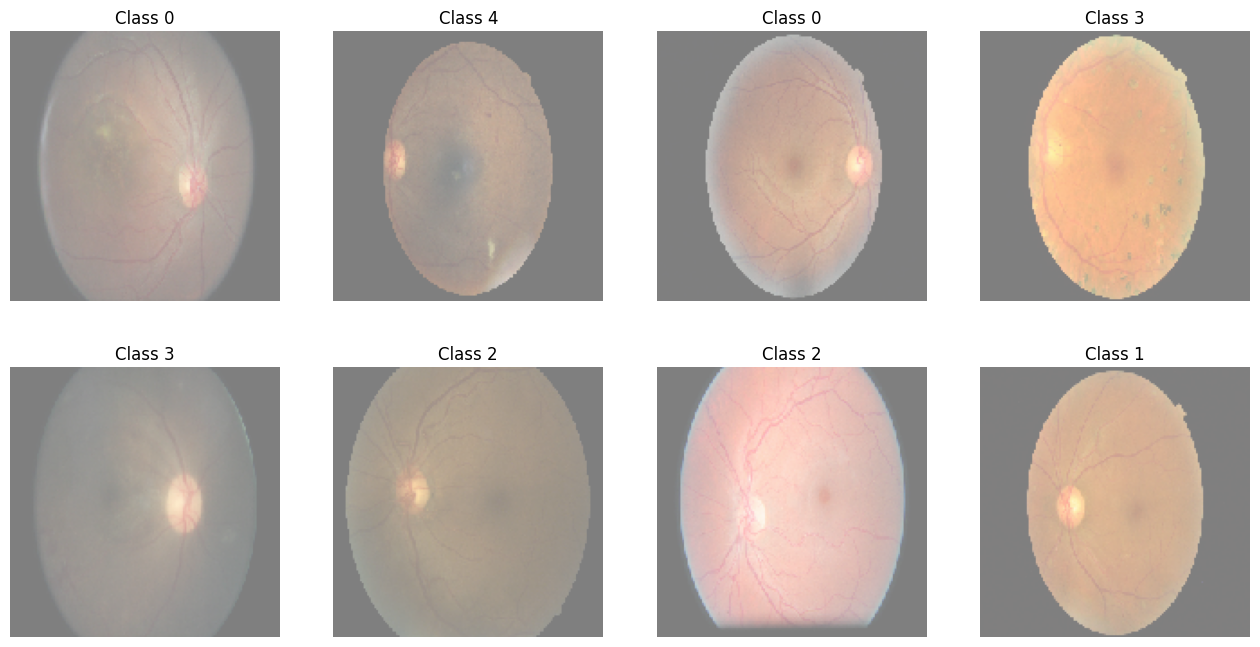

In [ ]:
# Get a batch of images and their labels from the train_data
t_x, t_y = next(training_data_generator)

# Visualize the images
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(np.clip(c_x*127+127, 0, 255).astype(np.uint8))
    c_ax.set_title('Class {}'.format(np.argmax(c_y, -1)))
    c_ax.axis('off')

plt.show()

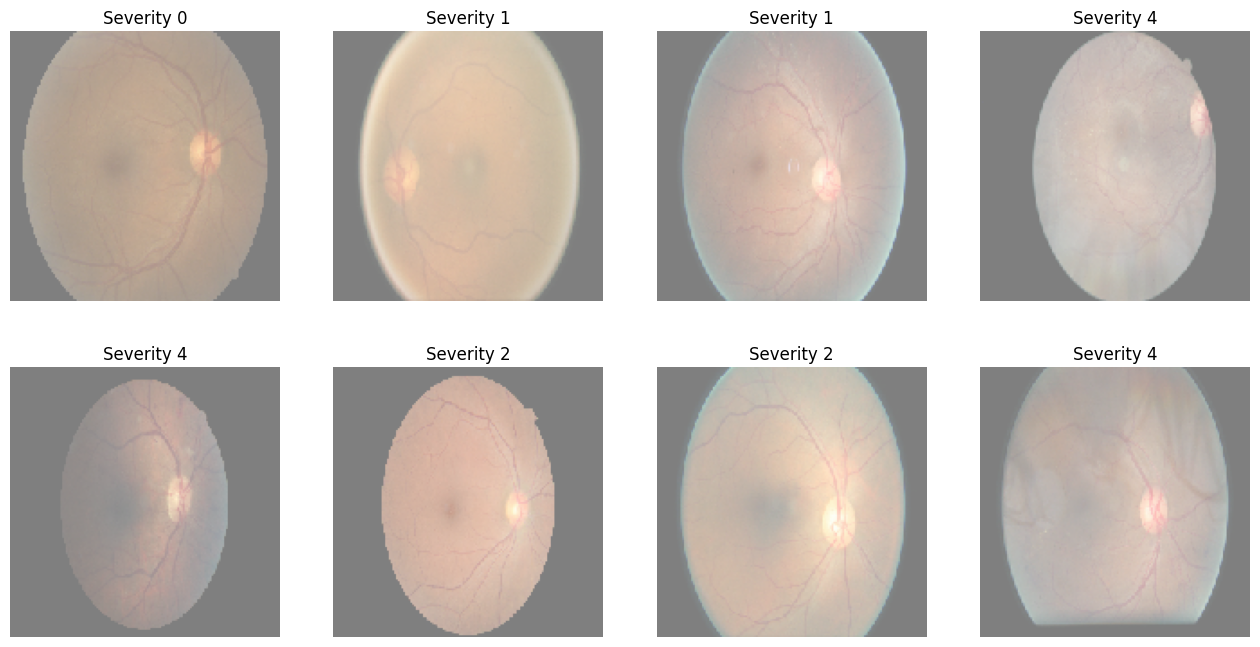

In [ ]:
# Get a batch of validation data
t_x, t_y = next(validation_data_generator)
# Visualize the images
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(np.clip(c_x*127+127, 0, 255).astype(np.uint8))
    c_ax.set_title('Severity {}'.format(np.argmax(c_y, -1)))
    c_ax.axis('off')

**Without residual**

In [ ]:
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Input, concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2  # Import kernel regularizer

# Define model inputs
inputs = Input(shape=(150, 150, 3))

# Branch 1 - No residual blocks
branch1 = Conv2D(32, kernel_size=3, activation='relu', padding='same', kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.001))(inputs)  # Adjust filter size as needed
branch1 = MaxPooling2D((2, 2))(branch1)
branch1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', kernel_initializer='glorot_uniform')(branch1)  # Adjust filter size as needed
branch1 = MaxPooling2D((2, 2))(branch1)

# Branch 2 - He initialization for ReLU activation
branch2 = Conv2D(32, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.001))(inputs)  # Adjust filter size as needed
branch2 = MaxPooling2D((2, 2))(branch2)
branch2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_normal')(branch2)  # Adjust filter size as needed
branch2 = MaxPooling2D((2, 2))(branch2)

# Branch 3 - Glorot uniform for all layers
branch3 = Conv2D(32, kernel_size=3, activation='relu', padding='same', kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.001))(inputs)  # Adjust filter size as needed
branch3 = MaxPooling2D((2, 2))(branch3)
branch3 = Conv2D(64, kernel_size=3, activation='relu', padding='same', kernel_initializer='glorot_uniform')(branch3)  # Adjust filter size as needed
branch3 = MaxPooling2D((2, 2))(branch3)

# Concatenate branches
concatenated = concatenate([branch1, branch2, branch3], axis=-1)

# Flatten and add dense layers
flattened = Flatten()(concatenated)

dense11 = Dense(128, activation="relu", kernel_initializer='glorot_uniform')(flattened)
dropout11 = Dropout(0.25)(dense11)
dense12 = Dense(256, activation="relu", kernel_initializer='glorot_uniform')(dropout11)
dense13 = Dense(1024, activation="relu", kernel_initializer='glorot_uniform')(dense12)
dense14 = Dense(256, activation="relu", kernel_initializer='glorot_uniform')(dense13)

# Similar dense layers for Branch 2 and 3 (He normal for ReLU)
dense21 = Dense(128, activation="relu", kernel_initializer='he_normal')(flattened)
dropout21 = Dropout(0.25)(dense21)
dense22 = Dense(256, activation="relu", kernel_initializer='he_normal')(dropout21)
dense23 = Dense(1024, activation="relu", kernel_initializer='he_normal')(dense22)
dense24 = Dense(256, activation="relu", kernel_initializer='he_normal')(dense23)

dense31 = Dense(128, activation="relu", kernel_initializer='glorot_uniform')(flattened)
dropout31 = Dropout(0.25)(dense31)
dense32 = Dense(256, activation="relu", kernel_initializer='glorot_uniform')(dropout31)
dense33 = Dense(1024, activation="relu", kernel_initializer='glorot_uniform')(dense32)
dense34 = Dense(256, activation="relu", kernel_initializer='glorot_uniform')(dense33)

# Concatenate the dense layer outputs
concatlayers = concatenate([dense14, dense24, dense34], axis=-1)

outputs = Dense(5, activation='softmax')(concatlayers)  # Adjust num_classes

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model (replace with your optimizer, loss, and metrics)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


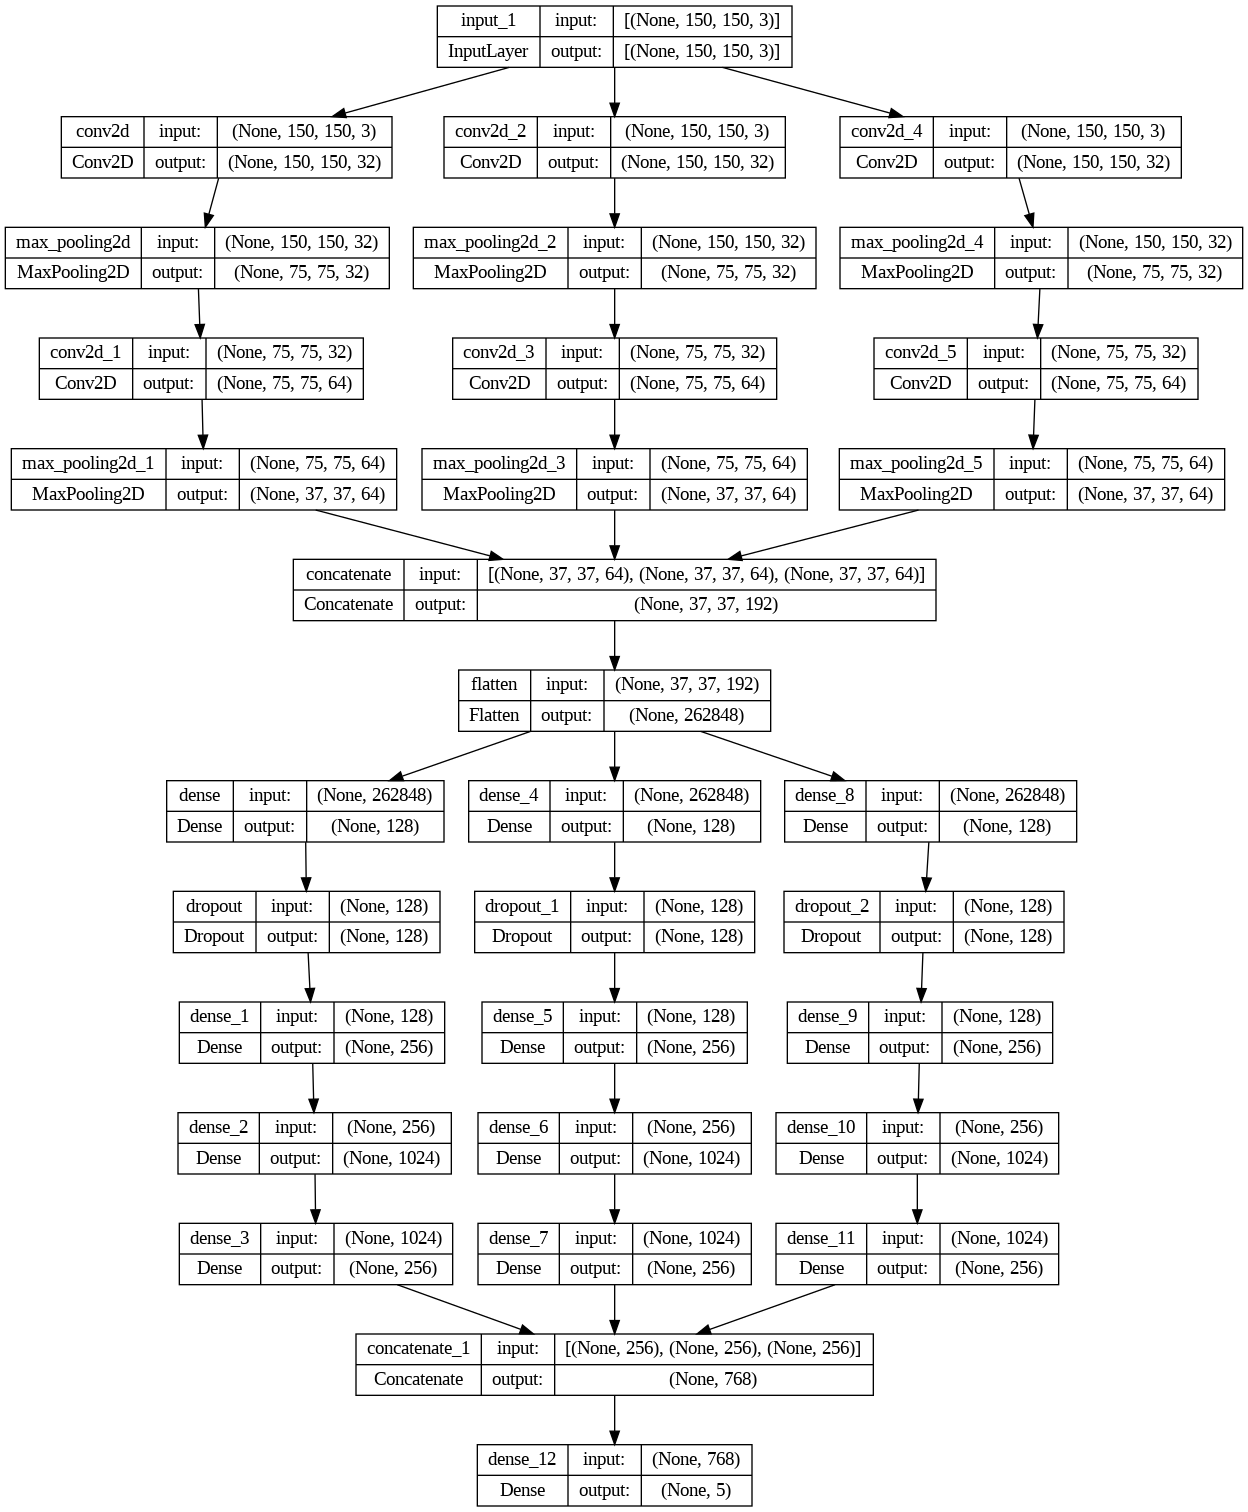

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True)

## Theoretical Explanation of the Code

This code snippet focuses on the theoretical aspects of applying an exponential learning rate decay schedule with the Adam optimizer in a deep learning model.

**1. Learning Rate Decay:**

- In deep learning, the learning rate controls how much the model's weights are updated during training based on the calculated loss.
- A high learning rate can lead to faster learning but also increase the risk of overfitting (model performing well on training data but poorly on unseen data).
- A low learning rate can lead to slower learning and potentially get stuck in suboptimal solutions.
- Exponential learning rate decay addresses this by starting with a relatively high learning rate to explore the solution space quickly and then gradually reducing it over time. This allows the model to refine its weights more precisely as training progresses.

**2. Exponential Decay Schedule:**

- The code implements an exponential decay schedule using `tf.keras.optimizers.schedules.ExponentialDecay`. This function takes several arguments:
   - `initial_learning_rate`: The starting learning rate for the optimizer.
   - `decay_steps`: The number of training steps after which the learning rate will be decayed.
   - `decay_rate`: The factor by which the learning rate will be multiplied after each `decay_steps`. A value of 0.9 means it will decrease by 10% every `decay_steps`.
   - `staircase` (optional): Controls the decay behavior. With `staircase=True` (used here), the learning rate remains constant for each epoch and drops at the beginning of the next (discrete changes). Without `staircase=True`, the learning rate decays smoothly within each epoch (continuous changes).

**3. Adam Optimizer:**

- The code uses the Adam optimizer (`tf.keras.optimizers.Adam`) with the learning rate schedule. Adam is a popular adaptive learning rate optimizer that automatically adjusts the learning rate for each parameter during training based on estimates of first and second moments of the gradients. This can help the optimizer converge faster and potentially find better solutions compared to fixed learning rate optimizers.

**4. Overall Effect:**

- By combining the exponential learning rate decay schedule with the Adam optimizer, you achieve a dynamic learning rate adjustment strategy.
- The initial high learning rate allows the model to make significant progress early in training, while the gradual decay helps the model fine-tune its weights later and potentially avoid overfitting.

**Theoretical Benefits:**

- This approach can improve model convergence by allowing for exploration in the beginning and then focusing on refinement later.
- It can help prevent overfitting by reducing the learning rate as the model approaches optimal weights.
- The Adam optimizer's adaptive learning rate adjustments can further enhance this process.

In [ ]:
from tensorflow.keras.optimizers import schedules
initial_learning_rate = 0.001
decay_steps = 10000  # Adjust decay steps as needed
decay_rate = 0.9  # Adjust decay rate as needed

learning_rate_schedule = schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True)  # Set staircase to True for discrete learning rate changes

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule),
              loss='categorical_crossentropy', metrics=['accuracy'])
total_training_images = training_data_generator.samples
batch_size=128
steps_per_epoch = total_training_images // batch_size
history=model.fit(training_data_generator,epochs=100,validation_data=validation_data_generator,steps_per_epoch=steps_per_epoch)

Epoch 1/100
200/200 [==============================] - 46s 177ms/step - loss: 1.8306 - accuracy: 0.2425 - val_loss: 1.6345 - val_accuracy: 0.2881
Epoch 2/100
200/200 [==============================] - 24s 121ms/step - loss: 1.6215 - accuracy: 0.2820 - val_loss: 1.5755 - val_accuracy: 0.3298
Epoch 3/100
200/200 [==============================] - 28s 138ms/step - loss: 1.5718 - accuracy: 0.3208 - val_loss: 1.5274 - val_accuracy: 0.3633
Epoch 4/100
200/200 [==============================] - 23s 117ms/step - loss: 1.5189 - accuracy: 0.3669 - val_loss: 1.5053 - val_accuracy: 0.3666
Epoch 5/100
200/200 [==============================] - 28s 139ms/step - loss: 1.4519 - accuracy: 0.3911 - val_loss: 1.4616 - val_accuracy: 0.3931
Epoch 6/100
200/200 [==============================] - 24s 120ms/step - loss: 1.3912 - accuracy: 0.4234 - val_loss: 1.3377 - val_accuracy: 0.4441
Epoch 7/100
200/200 [==============================] - 24s 121ms/step - loss: 1.3148 - accuracy: 0.4642 - val_loss: 1.2801 -

In [ ]:
# prompt: Give thhe pretrained resnet and efficient net model to use

# Import the necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D

# Load the ResNet50 model with pre-trained ImageNet weights
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add a global average pooling layer to convert the feature maps to a single vector
x = resnet_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer for the output
predictions = Dense(5, activation='softmax')(x)

# Create the ResNet50 model
resnet_model = Model(inputs=resnet_model.input, outputs=predictions)

# Load the EfficientNetB0 model with pre-trained ImageNet weights
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add a global average pooling layer to convert the feature maps to a single vector
x = efficientnet_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer for the output
predictions = Dense(5, activation='softmax')(x)

# Create the EfficientNetB0 model
efficientnet_model = Model(inputs=efficientnet_model.input, outputs=predictions)


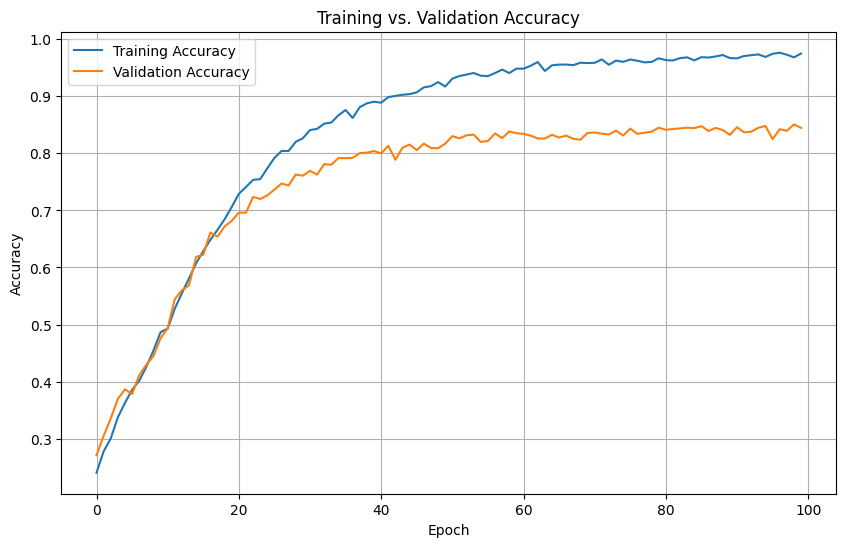

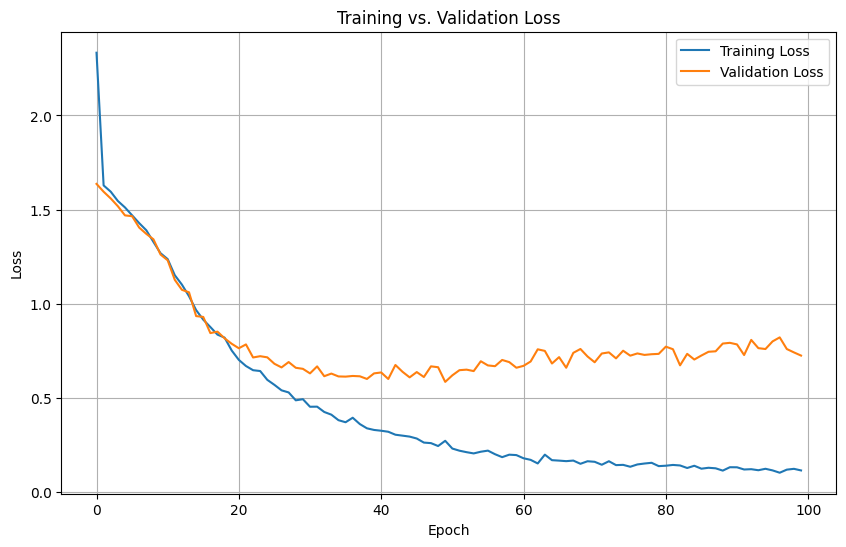

In [ ]:
import matplotlib.pyplot as plt

# Assuming your model training history is stored in a variable named 'history'
# Make sure history contains keys named 'accuracy', 'val_accuracy' and 'loss' for training accuracy, validation accuracy and loss respectively

# Extract data from history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
epochs = range(len(training_accuracy))  # Create list of epochs

# Create the first figure (Accuracy)
plt.figure(figsize=(10, 6))  # Set figure size for better visualization

# Plot training and validation accuracy
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')

# Set labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')

# Add legend
plt.legend()

# Grid for better readability
plt.grid(True)

# Show the accuracy plot
plt.show()


# Create the second figure (Loss)
plt.figure(figsize=(10, 6))  # Set figure size

# Plot training and validation loss
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')  # Assuming validation loss stored in 'val_loss' key

# Set labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')

# Add legend
plt.legend()

# Grid for better readability
plt.grid(True)

# Show the loss plot
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
predicted_labels = model.evaluate(test_data_generator)

250/250 [==============================] - 18s 73ms/step - loss: 0.6948 - accuracy: 0.8478
